In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Loading Dataset

In [85]:
df = pd.read_csv('data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Describing the dataset

In [86]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
# We can see that this is an unbalanced dataset

# Datatype of the features

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Checking Null value

In [89]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Checking duplicate values

In [90]:
df.duplicated().sum()

0

# Finding Unique features

In [91]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [92]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [93]:
#In the dataset we can see that the there are some unwanted  columns as in they won't affecct the model if removed

df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
#Finding the shape of the dataset

df.shape

(10000, 11)

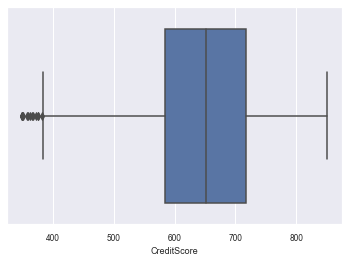

In [95]:
sns.boxplot(df.CreditScore)
plt.show()



In [96]:
#In this we can see that their are many outliers in Credit Score

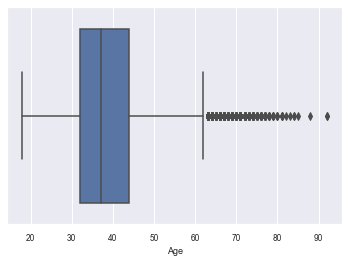

In [97]:
sns.boxplot(df.Age)
plt.show()

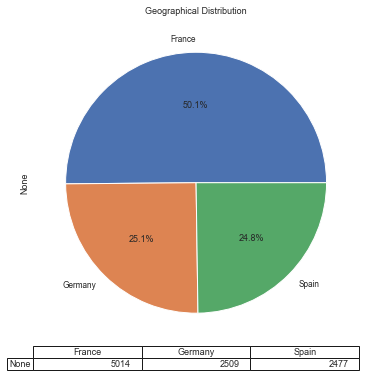

In [98]:
df.groupby(['Geography']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Geographical Distribution",autopct='%1.1f%%')
plt.show()

In [99]:
# Here we can see Geographical Distribution, More than half of the customers are from France.

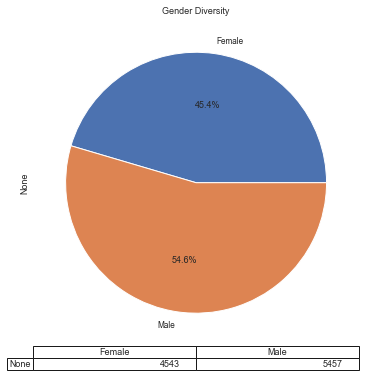

In [100]:
df.groupby(['Gender']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Gender Diversity",autopct='%1.1f%%')
plt.show()

In [101]:
# This is Gender Diversity pie chart, we can conclude that there are more male customers than the female cusomers

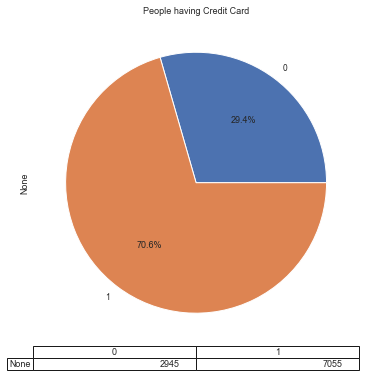

In [102]:
df.groupby(['HasCrCard']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="People having Credit Card",autopct='%1.1f%%')
plt.show()

In [103]:
# From the graph we can see that we have 70% of customers who have Credit Card

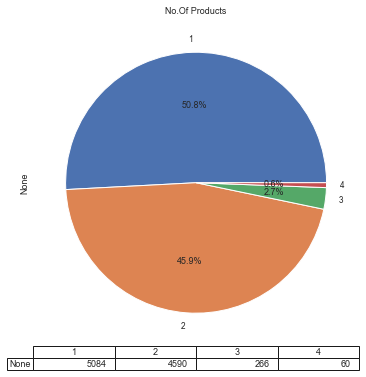

In [104]:
df.groupby(['NumOfProducts']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="No.Of Products",autopct='%1.1f%%')
plt.show()

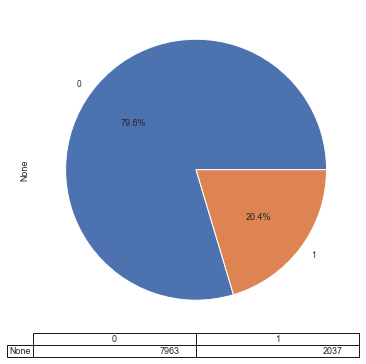

In [105]:
df.groupby(['Exited']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,autopct='%1.1f%%')
labels = ["Loyal Customer","Churn Customers"]
plt.show()

In [106]:
# In this we can observe that most number of customers has enrolled for only 1 product.

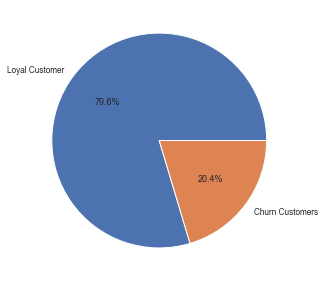

In [107]:
ExitedValues = df.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, autopct='%1.1f%%') 
plt.tight_layout()
plt.show()

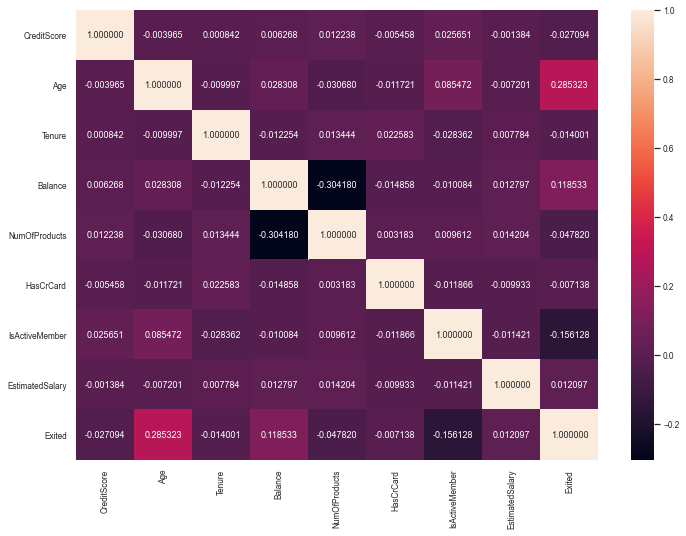

In [108]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(df.corr(), annot = True, fmt = ".6f")
plt.show()

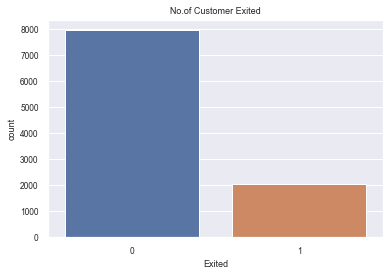

In [109]:
sns.countplot(df.Exited).set_title('No.of Customer Exited')
plt.show()

# Defining dependent and independent varibles

In [110]:
x = df.iloc[:,:-1]

In [111]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [112]:
y =  df.iloc[:,-1:]

In [113]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Categorical values and Numerical Values

In [114]:
cat_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=="O":
        cat_col.append(col)
    else:
        num_col.append(col)

In [115]:
print("Object data type features ",cat_col)
print("Numerical data type features ",num_col)

Object data type features  ['Geography', 'Gender']
Numerical data type features  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


# Using LabelEncoder 

In [116]:
# I used Label Encoder as its Ordinal Datatype

In [117]:
from sklearn.preprocessing import LabelEncoder

laen = LabelEncoder()
laen.fit_transform(df['Gender'])
x['Gender_label'] = laen.fit_transform(df['Gender'])

In [118]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
x['Gender_label'].value_counts()

1    5457
0    4543
Name: Gender_label, dtype: int64

In [120]:
x['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [121]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Using OneHotEnoder

In [122]:
from sklearn.preprocessing  import OneHotEncoder

In [123]:
Geography_lables = pd.get_dummies(x['Geography'])

In [124]:
Geography_lables

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [125]:
x.join(Geography_lables)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [126]:
x = x.join(Geography_lables)

In [127]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Dropping unwanted Features

In [128]:
x.drop(['Geography','Gender','Spain'],axis=1,inplace=True)

In [129]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label,France,Germany
0,619,42,2,0.00,1,1,1,101348.88,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0


# Train-Test Split

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Standarization of the data

In [132]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

# LOGISTIC REGRESSION

In [133]:
lor=LogisticRegression()

In [134]:
lor.fit(x_train, y_train)

LogisticRegression()

# Cross Validation Score

In [135]:
cv_score = cross_val_score(lor,x_train,y_train,cv=5)
np.mean(cv_score)

0.810375

In [136]:
y_pred=lor.predict(x_test)

In [137]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

In [138]:
cm

array([[1541,   66],
       [ 313,   80]], dtype=int64)

# Accuracy

In [139]:
TP, TN, FP, FN = 1541, 80, 66,313
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy:',Accuracy*100)

Accuracy: 81.05


# Recall

In [140]:
TP = 1541
FN = 313

recall = TP / (TP + FN)*100
print(f"recall: {recall:4.2f}")

recall: 83.12


# Precision

In [141]:
TP = 1541
FP = 66

precision = TP / (TP + FP)*100
print(f"precision: {precision:4.2f}")

precision: 95.89


# RANDOM FOREST

In [142]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42, max_leaf_nodes=50)

rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

# Cross Validation Score

In [143]:
cv_score = cross_val_score(rfc,x_train,y_train,cv=5)
np.mean(cv_score)

0.8497499999999999

In [144]:
y_pred1 = rfc.predict(x_test)

In [145]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.84      0.29      0.43       393

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.67      2000
weighted avg       0.85      0.85      0.82      2000



In [146]:
f1_score(y_test,y_pred1)

0.42884250474383306

In [147]:
confusion_matrix(y_pred1,y_test)

array([[1586,  280],
       [  21,  113]], dtype=int64)

# Accuracy

In [148]:
TP, TN, FP, FN = 1586, 113, 280,21
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy:",Accuracy*100)

Accuracy: 84.95


# Recall

In [149]:
TP = 1586
FN = 21

recall = TP / (TP + FN)*100
print(f"recall: {recall:4.2f}")

recall: 98.69


# Precision

In [150]:
TP = 1586
FP = 280

precision = TP / (TP + FP)*100
print(f"precision: {precision:4.2f}")

precision: 84.99


# KNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [152]:
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)

KNeighborsClassifier()

# Cross Validation Score

In [153]:
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=5, scoring ='accuracy').mean())

0.7822


# Accuracy

In [154]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

In [155]:
cm

array([[1541,   66],
       [ 313,   80]], dtype=int64)

In [156]:
TP, TN, FP, FN = 1508, 141, 99,252
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy:",Accuracy*100)

Accuracy: 82.45


# Recall

In [157]:
TP = 1508
FN = 252

recall = TP / (TP + FN)*100
print(f"recall: {recall:4.2f}")

recall: 85.68


# Precision

In [158]:
TP = 1508
FP = 99

precision = TP / (TP + FP)*100
print(f"precision: {precision:4.2f}")

precision: 93.84


In [159]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_label,France,Germany
0,619,42,2,0.00,1,1,1,101348.88,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Prediction data

In [160]:
rfc.predict([[300,25,5,85000.04,1,0,4,10522.00,1,1,0]])

array([0], dtype=int64)

In [161]:
rfc.predict([[620,19,1,5000.04,1,0,4,1522.00,1,1,0]])

array([0], dtype=int64)

In [162]:
model_filename = 'model.pkl'
joblib.dump(rfc,model_filename)

['model.pkl']